<a href="https://colab.research.google.com/github/ibrahim10sy/learn-python/blob/main/Copie_de_regression_lineaire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy==2.2.0
!pip install pandas==2.2.3
!pip install scikit-learn==1.6.0
!pip install matplotlib==3.9.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 42.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.0 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.0 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 56.0 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependenc

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

Chargement du dataset

In [ ]:
url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"

In [ ]:
df = pd.read_csv(url)
df.to_csv('vehicule.csv',index=0)

In [ ]:
df.sample(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
823,2014,MITSUBISHI,LANCER SPORTBACK,STATION WAGON - SMALL,2.0,4,M5,X,9.8,7.1,8.6,33,198
691,2014,MASERATI,GRANTURISMO CONVERTIBLE,SUBCOMPACT,4.7,8,AS6,Z,18.2,11.7,15.3,18,352
644,2014,LAND ROVER,RANGE ROVER SPORT V6 3.0 SC FFV,SUV - STANDARD,3.0,6,AS8,Z,14.2,10.2,12.4,23,285
196,2014,CHEVROLET,CORVETTE,TWO-SEATER,6.2,8,M7,Z,13.7,8.2,11.2,25,258
997,2014,TOYOTA,TACOMA,PICKUP TRUCK - SMALL,2.7,4,M5,X,11.3,8.9,10.2,28,235


In [ ]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


Selection des features

In [ ]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.sample(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
758,4.7,8,15.6,359
628,2.0,4,8.8,202
917,3.6,6,11.9,274
61,4.0,8,12.2,281
163,3.6,6,11.4,262
623,2.4,4,11.0,253
135,2.0,4,9.1,209
756,3.0,6,12.0,324
447,4.8,8,18.0,414


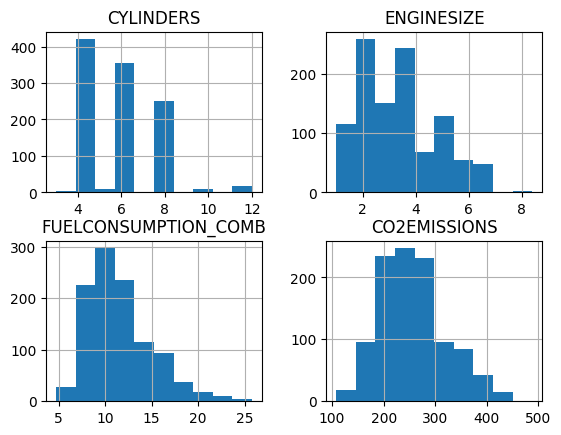

In [ ]:
viz = cdf[['CYLINDERS','ENGINESIZE','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
viz.hist()
plt.show()

Comme vous pouvez le constater, la plupart des moteurs ont 4, 6 ou 8 cylindres et une cylindrée comprise entre 2 et 4 litres.
Comme on peut s'y attendre, la consommation de carburant combinée et les émissions de CO2 présentent des distributions très similaires.
Affichez des diagrammes de dispersion de ces caractéristiques par rapport aux émissions de CO2 pour constater la linéarité de leurs relations.

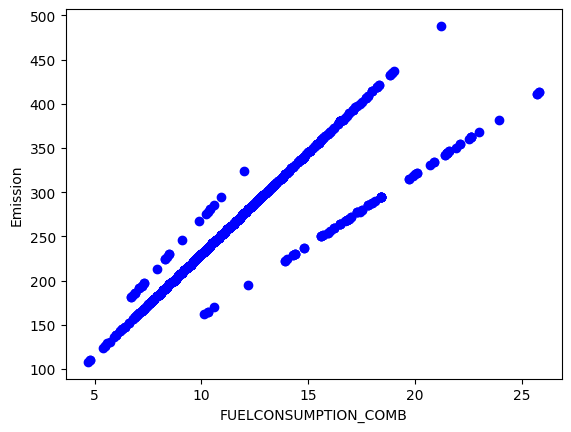

In [ ]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

Ce résultat est instructif. Trois groupes de véhicules présentent chacun une forte relation linéaire entre leur consommation combinée de carburant et leurs émissions de CO2. Leurs valeurs d'interception sont similaires, tandis que leurs pentes diffèrent sensiblement.

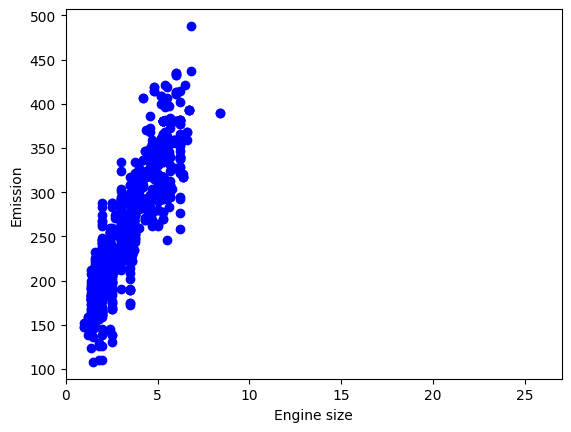

In [ ]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.xlim(0,27)
plt.show()

Bien que la relation entre la cylindre du moteur et les émissions de CO2 soit relativement linéaire, on constate que leur corrélation est plus faible que pour chacun des trois groupes de consommation. Notez que l'étendue de l'axe des abscisses a été élargie pour faciliter la comparaison des deux graphiques.


Tracez le graphique CYLINDRE par rapport aux émissions de CO2 pour voir à quel point leur relation est linéaire.

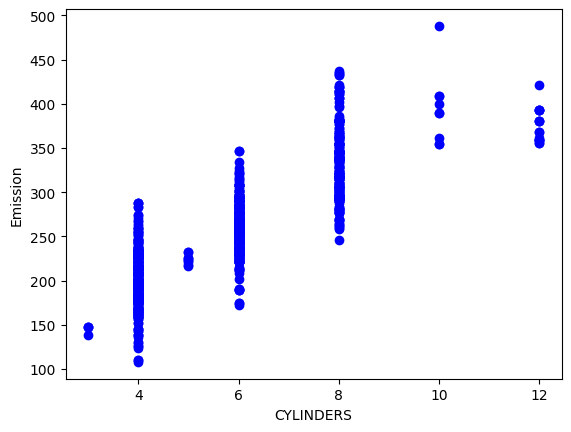

In [ ]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("CYLINDERS")
plt.ylabel("Emission")
# plt.xlim(0,27)
plt.show()

commencer le processus en extrayant la caractéristique d'entrée et les variables de sortie cibles, X et y, du jeu de données.

In [ ]:
X = cdf.ENGINESIZE.to_numpy()
y = cdf.CO2EMISSIONS.to_numpy()

In [ ]:
X

array([2. , 2.4, 1.5, ..., 3. , 3.2, 3.2])

Créer des jeux de données d'entraînement et de test

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=42)

In [ ]:
X_train

array([1.4, 4.4, 3. , 3. , 5.3, 4.4, 3.7, 2. , 4. , 3.6, 4.2, 2.4, 6.5,
       5. , 5.7, 3.7, 6.2, 3.5, 3.6, 2.4, 3.6, 2. , 2. , 2.5, 1.4, 3.6,
       3.6, 3.6, 4. , 2. , 3.5, 5.6, 2.5, 4. , 3.5, 1.6, 2. , 3.5, 5.3,
       3.7, 2. , 6.6, 3.7, 5.6, 3.6, 6.2, 3. , 1.4, 4.4, 4.3, 5. , 3.7,
       2. , 3.6, 2.4, 5.3, 5.7, 5.5, 1.6, 3. , 3.5, 4. , 3. , 1.6, 2.4,
       3. , 3.6, 1.4, 2.4, 2. , 3. , 5.4, 2.4, 4.8, 2. , 3.5, 3.6, 1.8,
       2. , 4.6, 5.3, 2.4, 5.8, 5. , 1.4, 2. , 2.7, 1.8, 2.5, 4. , 6. ,
       3. , 3. , 2. , 1.2, 2.4, 3. , 4.6, 5. , 2. , 2. , 1.6, 2. , 5.3,
       6.2, 1.5, 2.5, 2. , 3.6, 5.4, 3.5, 3.6, 2. , 4.4, 3. , 1.4, 6.2,
       2. , 6. , 3.6, 3.6, 5.3, 2.4, 5.3, 5. , 5.3, 3.5, 2.7, 4.4, 2.5,
       1.8, 2.5, 5.7, 5.3, 2.4, 2. , 6.2, 1.6, 2. , 1.6, 3. , 2.5, 5.3,
       3.5, 5.3, 3.8, 4.8, 3.7, 6. , 2.5, 2.4, 1.6, 3.8, 6.2, 2.5, 1.6,
       2. , 2.5, 1.8, 3.5, 6.6, 3.7, 1.5, 2.4, 2. , 3.6, 4.8, 3.6, 3. ,
       1.5, 2.7, 1.6, 2.4, 5. , 3.7, 1.2, 2.5, 2.4, 2.4, 3.5, 2.

In [ ]:
type(X_train), np.shape(X_train)

(numpy.ndarray, (853,))

Créer un modèle de régression linéaire simple

In [ ]:
from sklearn import linear_model

reg = linear_model.LinearRegression()

reg.fit(X_train.reshape(-1, 1), y_train)

print ('Coefficients: ', reg.coef_[0])
print ('Intercept: ',reg.intercept_)

Coefficients:  38.992978724434074
Intercept:  126.28970217408721


Visualiser les résultats du modèle
Vous pouvez visualiser l'adéquation du modèle aux données d'apprentissage en traçant la droite d'ajustement sur les données.

Le modèle de régression est la droite donnée par y = ordonnée à l'origine + coefficient * x.

Text(0, 0.5, 'Emission')

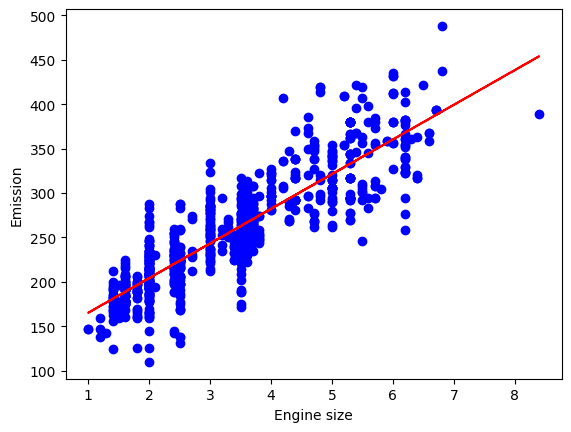

In [ ]:
plt.scatter(X_train ,y_train, color="blue")
plt.plot(X_train, reg.coef_ * X_train + reg.intercept_, '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

Évaluation du modèle
Vous pouvez comparer les valeurs réelles et les valeurs prédites pour calculer la précision d'un modèle de régression. Les indicateurs d'évaluation jouent un rôle essentiel dans le développement d'un modèle, car ils permettent d'identifier les points à améliorer.

Il existe différentes mesures d'évaluation de modèle. Utilisons ici l'erreur quadratique moyenne (EQM) pour calculer la précision de notre modèle à partir de l'ensemble de test :

Erreur absolue moyenne : Il s'agit de la moyenne de la valeur absolue des erreurs. C'est la mesure la plus simple à comprendre, car il s'agit simplement d'une erreur moyenne.

Erreur quadratique moyenne (EQM) : L'EQM est la moyenne de l'erreur quadratique. C'est la mesure utilisée par le modèle pour trouver la droite d'ajustement optimale, d'où son nom de somme des carrés résiduels.

Erreur quadratique moyenne (EQM). L'EQM convertit simplement l'EQM dans les mêmes unités que les variables comparées, ce qui facilite son interprétation.

Le R² n'est pas une erreur, mais plutôt une mesure courante utilisée pour estimer la performance d'un modèle de régression. Il représente la proximité des points de données par rapport à la droite de régression ajustée. Plus le R² est élevé, plus le modèle s'ajuste à vos données. Le meilleur score possible est de 1,0 et il peut être négatif (car le modèle peut être arbitrairement moins performant).

Évaluation du modèle

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score

# Use the predict method to make test predictions
y_test_ = regressor.predict( X_test.reshape(-1,1))

print("Mean absolute error: %.2f" % mean_absolute_error(y_test_, y_test))
print("Mean squared error: %.2f" % mean_squared_error(y_test_, y_test))
print("Root mean squared error: %.2f" % root_mean_squared_error(y_test_, y_test))
print("R2-score: %.2f" % r2_score( y_test_, y_test) )